# Scatterplots

## Setup

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"
colors_blue = [blue, blue_light]

## Data

In [2]:
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA_LOAN50 = "loan50.csv"
DATA_COUNTY = "county.csv"

df_loan50 = pd.read_csv(ROOT + DATA_LOAN50)
df_county = pd.read_csv(ROOT + DATA_COUNTY)

print(df_loan50[["loan_amount", "total_income"]].head())
print("")
print(df_county[["poverty", "median_hh_income"]].head())

   loan_amount  total_income
0        22000         59000
1         6000         60000
2        25000         75000
3         6000         75000
4        25000        254000

   poverty  median_hh_income
0     13.7           55317.0
1     11.8           52562.0
2     27.2           33368.0
3     15.2           43404.0
4     15.6           47412.0


## Scatterplots

A scatterplot of loan amount versus total income for the loan50 dataset.

### Basic scatterplot

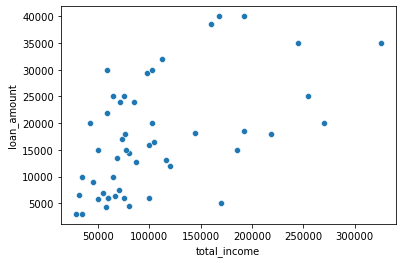

In [3]:
sns.scatterplot(data=df_loan50, 
                x="total_income", 
                y= "loan_amount", 
                palette=colors_blue);

### Advanced scatterplot

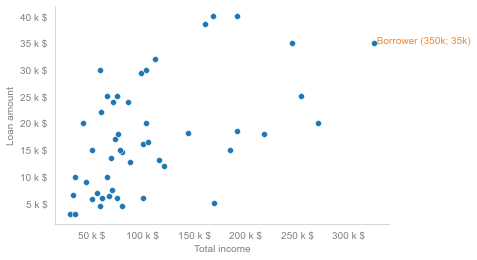

In [6]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots()

sns.scatterplot(data=df_loan50, x="total_income", y= "loan_amount", palette=colors_blue)

# Use automatic Formatter
ax.yaxis.set_major_formatter('{x:1.0f} k $')
ax.yaxis.set_major_formatter(ticker.EngFormatter(' $'))
ax.yaxis.set_tick_params(which='major', labelcolor='grey', labelleft=True)
ax.xaxis.set_major_formatter(ticker.EngFormatter(' $'))
ax.xaxis.set_tick_params(which='major', labelcolor='grey')  

ax.xaxis.label.set_color('grey')
ax.yaxis.label.set_color('grey')

plt.xlabel("Total income")
plt.ylabel("Loan amount")

# Anotation
max_income_borrower = np.argmax(df_loan50.total_income)
x_value = df_loan50.total_income[max_income_borrower]
y_value = df_loan50.loan_amount[max_income_borrower]

#ax.plot(x_value, y_value,'o', ms=10, color=orange)
ax.annotate(text=' Borrower (350k; 35k)', xy=(x_value, y_value), color=orange)

# remove top and right axes splines
sns.despine();

## Scatterplot with model

- A scatterplot of the median household income against the poverty rate for the county dataset.

- A statistical model has also been fit to the data and is shown as orange line.

### Basic version

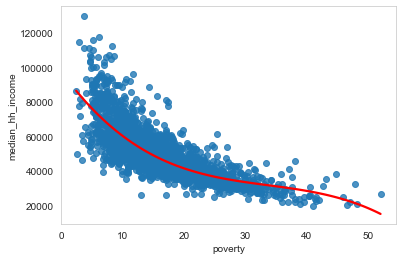

In [7]:
sns.regplot(data=df_county, 
            x="poverty", 
            y="median_hh_income", 
            order=3, 
            ci=None,
            line_kws={"color": "red"}
           );

### Advanced version

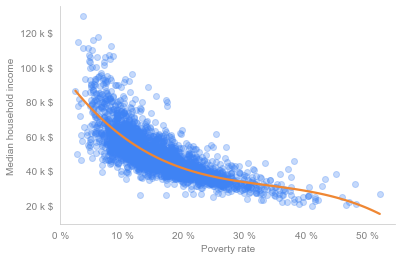

In [8]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots()

sns.regplot(data=df_county, x="poverty", y= "median_hh_income", order=3, 
            ci=None, scatter_kws={"color": "#3F83F4", "alpha": 0.3}, line_kws={"color": "#EF8733"})

plt.xlabel("Median household income")
plt.ylabel("Poverty rate")

# Use automatic Formatter
ax.yaxis.set_major_formatter(ticker.EngFormatter(' $'))
ax.yaxis.set_tick_params(which='major', labelcolor='grey',labelleft=True)
ax.xaxis.set_major_formatter(ticker.EngFormatter('%'))
ax.xaxis.set_tick_params(which='major', labelcolor='grey')  

ax.xaxis.label.set_color('grey')
ax.yaxis.label.set_color('grey')

plt.ylabel("Median household income")
plt.xlabel("Poverty rate")

# remove top and right axes splines
sns.despine();